C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\1314126842.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').mean()


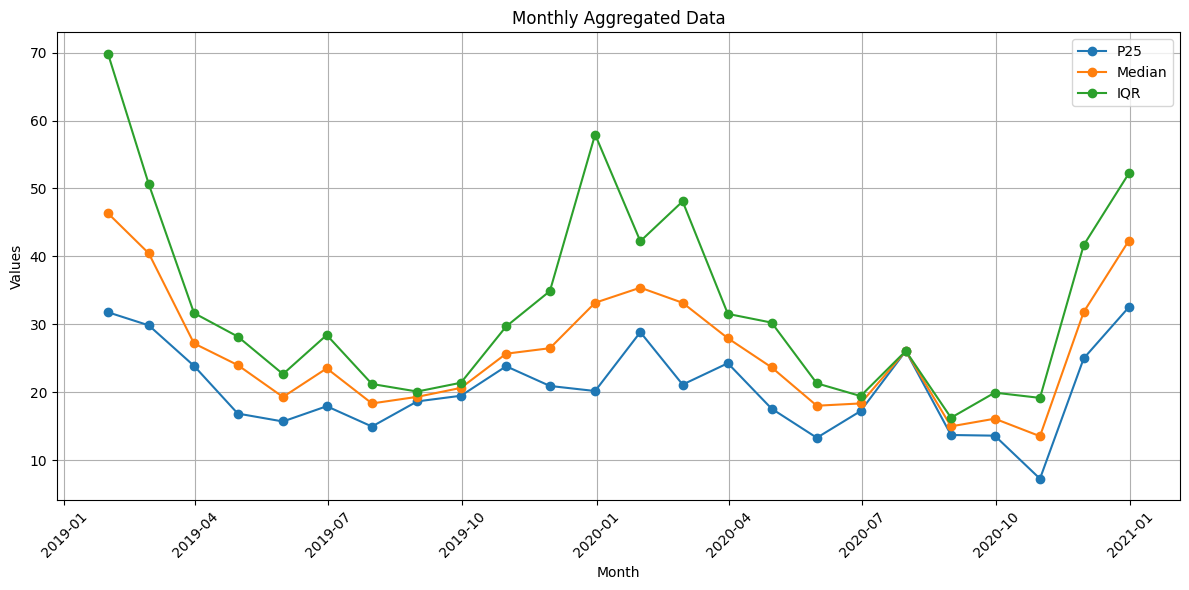

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('No2TimeSeries(Sampling needed).csv')

df['system:time_start'] = pd.to_datetime(df['system:time_start'])

df.set_index('system:time_start', inplace=True)

monthly_data = df.resample('M').mean()

plt.figure(figsize=(12, 6))

plt.plot(monthly_data.index, monthly_data['p25'], label='P25', marker='o')
plt.plot(monthly_data.index, monthly_data['Median'], label='Median', marker='o')
plt.plot(monthly_data.index, monthly_data['IQR'], label='IQR', marker='o')

plt.title('Monthly Aggregated Data')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


  system:time_start     p25  Median     IQR
0       Jan 1, 2019     NaN     NaN     NaN
1       Jan 7, 2019  30.105  58.755  88.549
2      Jan 16, 2019  42.901  49.083  67.059
3      Jan 25, 2019  22.307  31.209  53.989
4       Feb 3, 2019  41.900  46.840  55.141


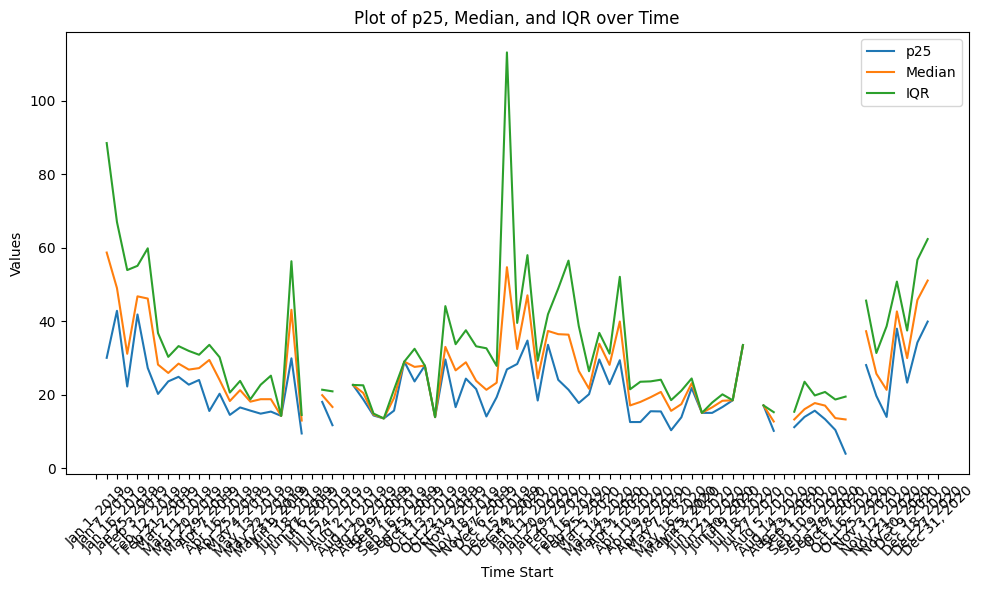

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'No2TimeSeries(Sampling needed).csv'  
data = pd.read_csv(file_path)

print(data.head())

plt.figure(figsize=(10, 6))

plt.plot(data['system:time_start'], data['p25'], label='p25')
plt.plot(data['system:time_start'], data['Median'], label='Median')
plt.plot(data['system:time_start'], data['IQR'], label='IQR')

plt.xlabel('Time Start')
plt.ylabel('Values')
plt.title('Plot of p25, Median, and IQR over Time')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\2410217554.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


                         p25     Median        IQR
system:time_start                                 
2019-01-31         31.771000  46.349000  69.865667
2019-02-28         29.839667  40.444000  50.627667
2019-03-31         23.875250  27.180750  31.650250
2019-04-30         16.849000  23.987333  28.189333
2019-05-31         15.682500  19.292750  22.664750


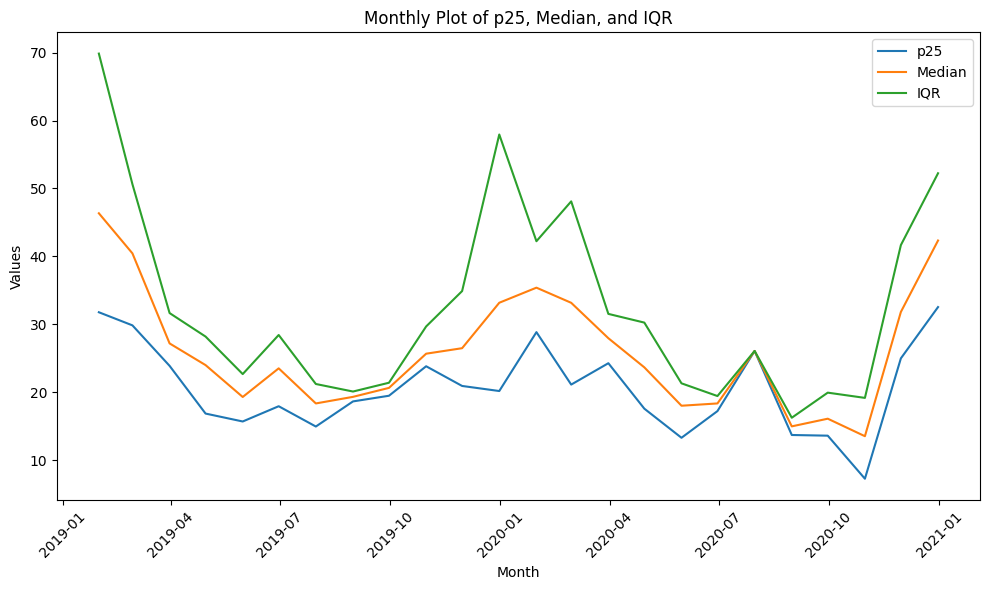

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'No2TimeSeries(Sampling needed).csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data.resample('M').mean()

print(monthly_data.head())

plt.figure(figsize=(10, 6))
plt.plot(monthly_data.index, monthly_data['p25'], label='p25')
plt.plot(monthly_data.index, monthly_data['Median'], label='Median')
plt.plot(monthly_data.index, monthly_data['IQR'], label='IQR')

plt.xlabel('Month')
plt.ylabel('Values')
plt.title('Monthly Plot of p25, Median, and IQR')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\3815847798.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


                         p25     Median        IQR
system:time_start                                 
2019-01-31         31.771000  46.349000  69.865667
2019-02-28         29.839667  40.444000  50.627667
2019-03-31         23.875250  27.180750  31.650250
2019-04-30         16.849000  23.987333  28.189333
2019-05-31         15.682500  19.292750  22.664750
2019-06-30         17.929333  23.507667  28.420333
2019-07-31         14.939500  18.340000  21.204500
2019-08-31         18.639333  19.311333  20.093667
2019-09-30         19.473333  20.630333  21.389667
2019-10-31         23.816250  25.666500  29.677250
2019-11-30         20.915333  26.475667  34.888000
2019-12-31         20.168667  33.169333  57.948333
2020-01-31         28.841250  35.390750  42.231500
2020-02-29         21.116667  33.161333  48.101000
2020-03-31         24.264333  27.945667  31.529333
2020-04-30         17.571000  23.655000  30.246250
2020-05-31         13.282333  18.003000  21.302000
2020-06-30         17.212750  1

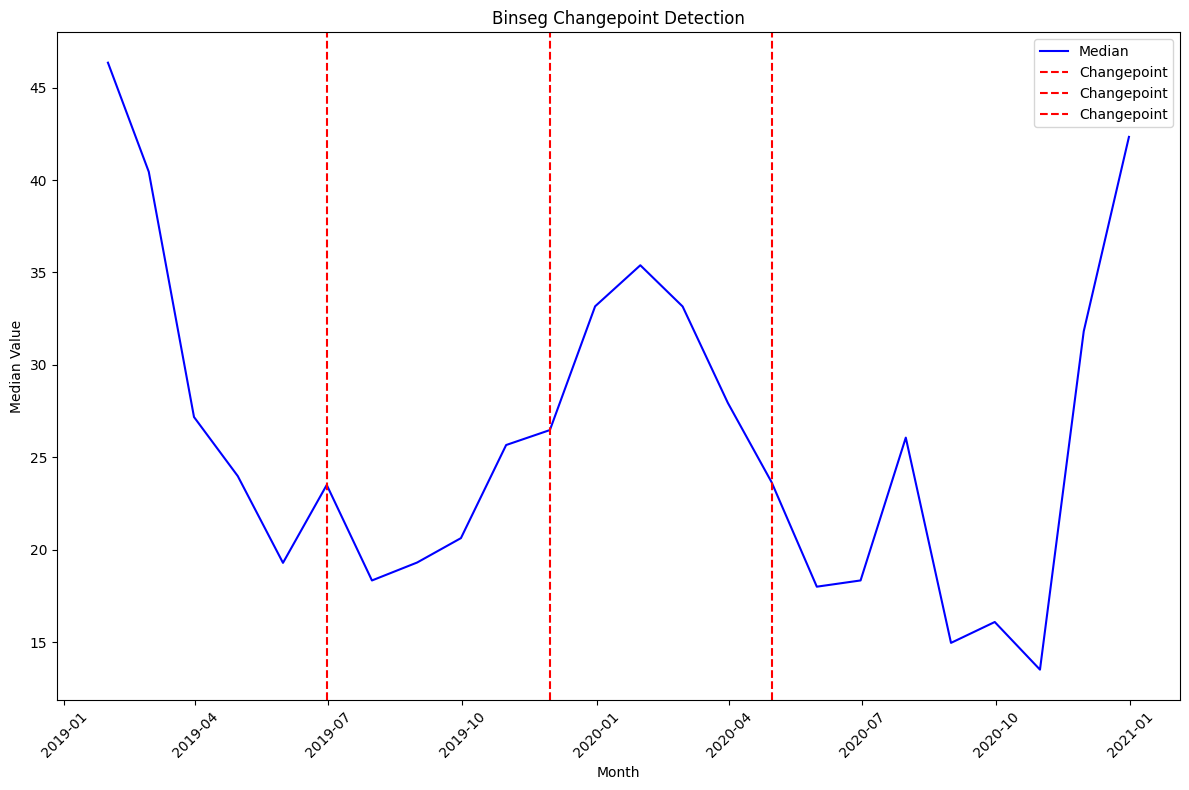

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

file_path = 'No2TimeSeries(Sampling needed).csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data.resample('M').mean()

print(monthly_data)

series = monthly_data['Median'].dropna().values  

model = "rbf"  
algo = rpt.Binseg(model=model).fit(series)

n_bkps = 3  
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 8))
plt.plot(monthly_data.index, series, label='Median', color='b')

for bkp in bkps:
    if bkp < len(monthly_data.index):
        plt.axvline(monthly_data.index[bkp], color='r', linestyle='--', label='Changepoint')

plt.xlabel('Month')
plt.ylabel('Median Value')
plt.title('Binseg Changepoint Detection')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


  system:time_start     p25  Median     IQR
0       Jan 1, 2019     NaN     NaN     NaN
1       Jan 7, 2019  30.105  58.755  88.549
2      Jan 16, 2019  42.901  49.083  67.059
3      Jan 25, 2019  22.307  31.209  53.989
4       Feb 3, 2019  41.900  46.840  55.141
system:time_start    0
p25                  7
Median               7
IQR                  7
dtype: int64


C:\Users\Ayush\AppData\Local\Temp\ipykernel_8220\191518392.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill to handle missing values


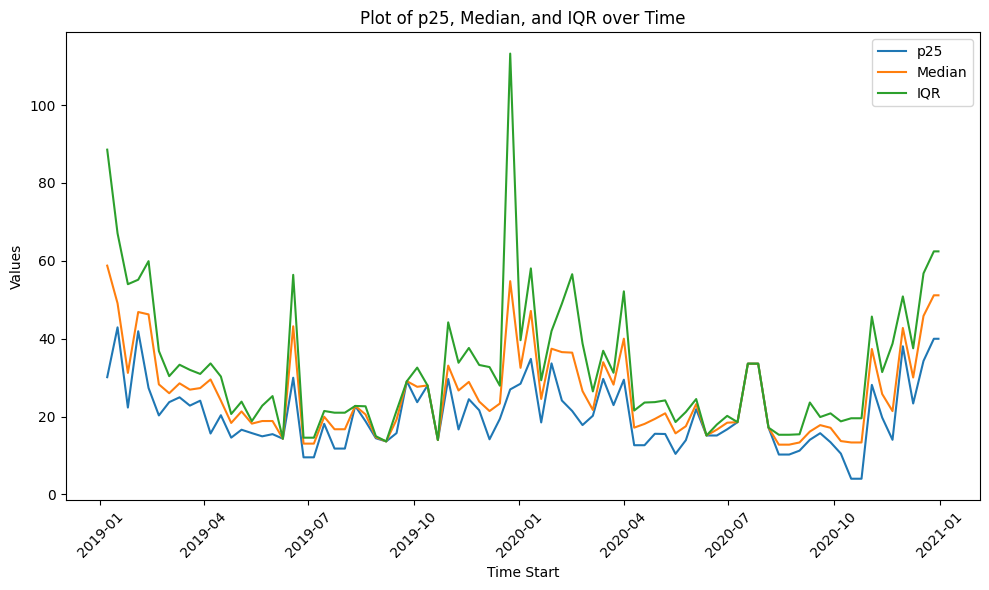

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'No2TimeSeries(Sampling needed).csv'  # Replace with the path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

# Check for missing data
print(data.isnull().sum())

# Handle missing data by filling or dropping (e.g., forward fill)
data = data.fillna(method='ffill')  # Forward fill to handle missing values
# Alternatively, use: data = data.dropna() to drop rows with missing values

# Convert 'system:time_start' to datetime format
data['system:time_start'] = pd.to_datetime(data['system:time_start'])

# Plot the data
plt.figure(figsize=(10, 6))

# Assuming 'system:time_start' is the x-axis and other columns are y-axis
plt.plot(data['system:time_start'], data['p25'], label='p25')
plt.plot(data['system:time_start'], data['Median'], label='Median')
plt.plot(data['system:time_start'], data['IQR'], label='IQR')

# Add labels and title
plt.xlabel('Time Start')
plt.ylabel('Values')
plt.title('Plot of p25, Median, and IQR over Time')
plt.legend()

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


  system:time_start     p25  Median     IQR
0       Jan 1, 2019     NaN     NaN     NaN
1       Jan 7, 2019  30.105  58.755  88.549
2      Jan 16, 2019  42.901  49.083  67.059
3      Jan 25, 2019  22.307  31.209  53.989
4       Feb 3, 2019  41.900  46.840  55.141
system:time_start    0
p25                  7
Median               7
IQR                  7
dtype: int64


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\3816482144.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


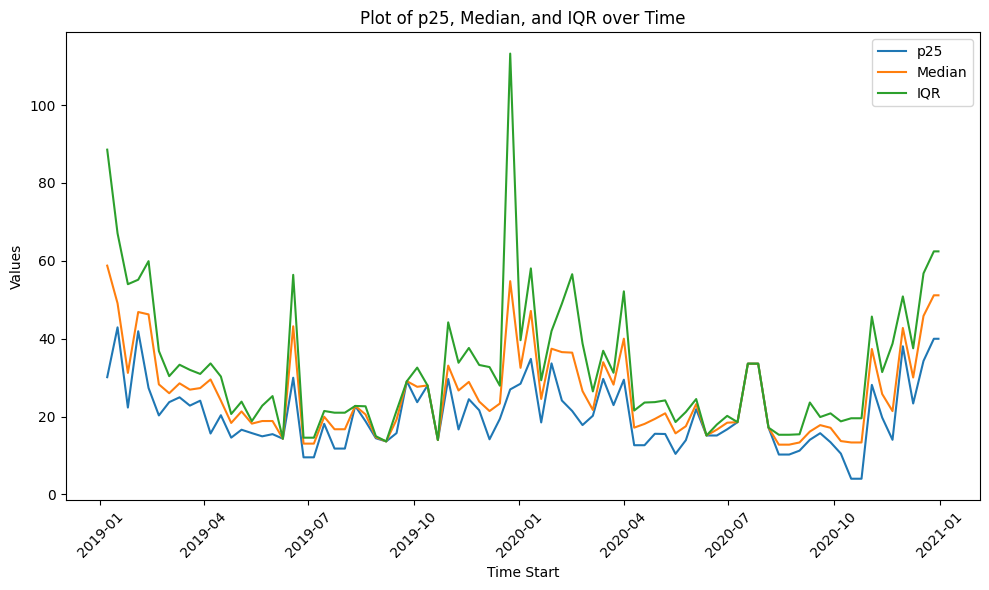

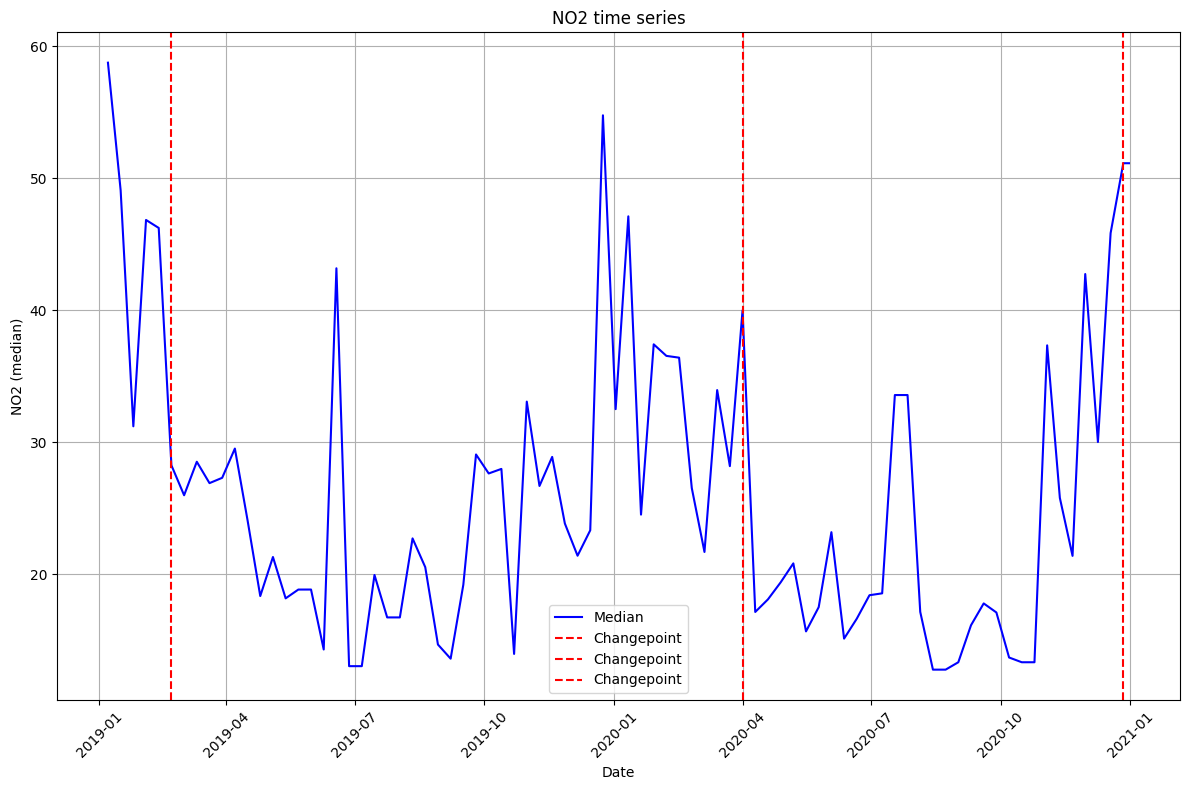

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

file_path = 'No2TimeSeries(Sampling needed).csv'  
data = pd.read_csv(file_path)

print(data.head())

print(data.isnull().sum())

data = data.fillna(method='ffill')  

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

plt.figure(figsize=(10, 6))

plt.plot(data['system:time_start'], data['p25'], label='p25')
plt.plot(data['system:time_start'], data['Median'], label='Median')
plt.plot(data['system:time_start'], data['IQR'], label='IQR')

plt.xlabel('Time Start')
plt.ylabel('Values')
plt.title('Plot of p25, Median, and IQR over Time')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()  
plt.show()

aligned_data = data[['system:time_start', 'Median']].dropna()
series = aligned_data['Median'].values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(series)

n_bkps = 3  
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 8))
plt.plot(aligned_data['system:time_start'], series, label='Median', color='b')

for bkp in bkps[:-1]: 
    plt.axvline(aligned_data['system:time_start'].iloc[bkp], color='r', linestyle='--', label='Changepoint')

plt.xlabel('Date')
plt.ylabel('NO2 (median)')
plt.title('NO2 time series')
plt.legend()
plt.grid()
changepoint_dates = df.index[bkps[:-1]]

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [22]:
changepoint_dates

DatetimeIndex(['2019-02-12', '2020-03-23', '2020-12-18'], dtype='datetime64[ns]', name='system:time_start', freq=None)

  system:time_start     p25  Median     IQR
0        2019-01-01     NaN     NaN     NaN
1        2019-01-07  30.105  58.755  88.549
2        2019-01-16  42.901  49.083  67.059
3        2019-01-25  22.307  31.209  53.989
4        2019-02-03  41.900  46.840  55.141
system:time_start    0
p25                  1
Median               1
IQR                  1
dtype: int64


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\464301791.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


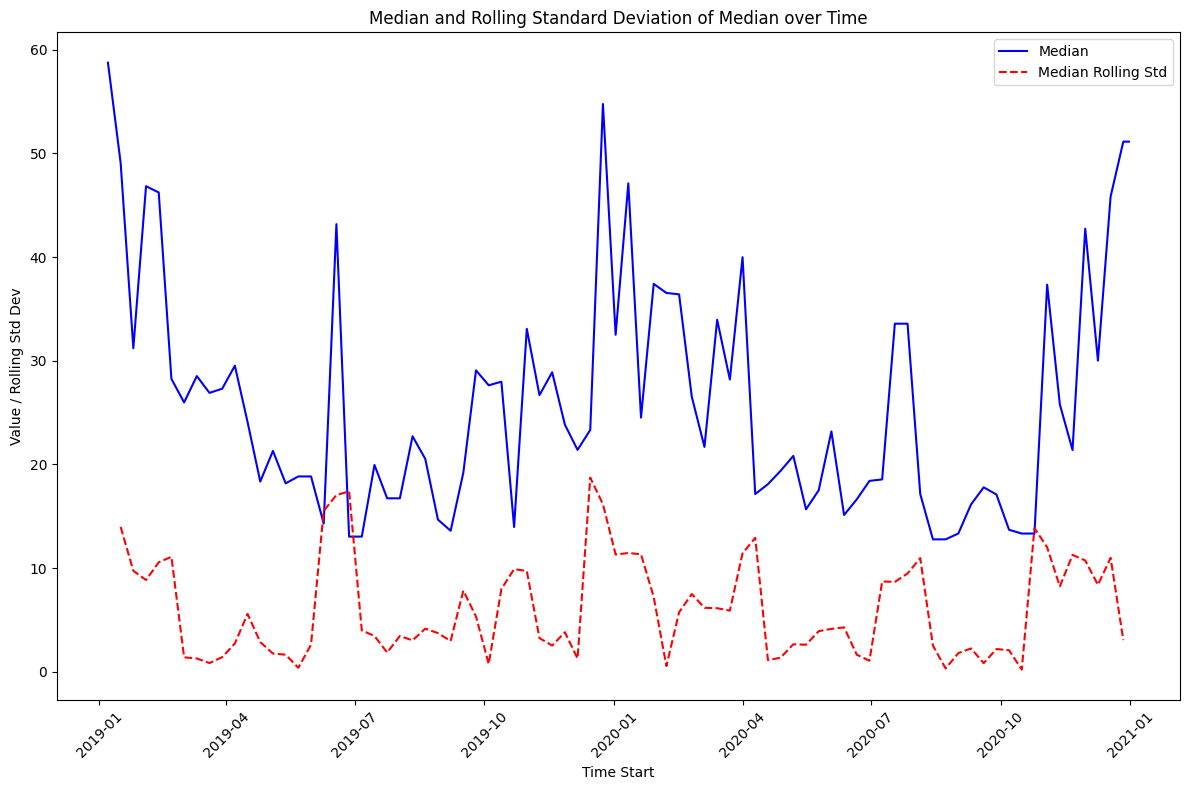

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'No2TimeSeries(Sampling needed).csv'  

print(data.head())

print(data.isnull().sum())

data = data.fillna(method='ffill') 

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

window_size = 3  
data['Median_rolling_std'] = data['Median'].rolling(window=window_size,center=True).std()

plt.figure(figsize=(12, 8))

plt.plot(data['system:time_start'], data['Median'], label='Median', color='b')

plt.plot(data['system:time_start'], data['Median_rolling_std'], label='Median Rolling Std', color='r', linestyle='--')

plt.xlabel('Time Start')
plt.ylabel('Value / Rolling Std Dev')
plt.title('Median and Rolling Standard Deviation of Median over Time')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()


C:\Users\Ayush\AppData\Local\Temp\ipykernel_12868\3795156912.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


                         p25     Median        IQR
system:time_start                                 
2019-01-31         31.771000  46.349000  69.865667
2019-02-28         29.839667  40.444000  50.627667
2019-03-31         23.875250  27.180750  31.650250
2019-04-30         16.849000  23.987333  28.189333
2019-05-31         15.682500  19.292750  22.664750


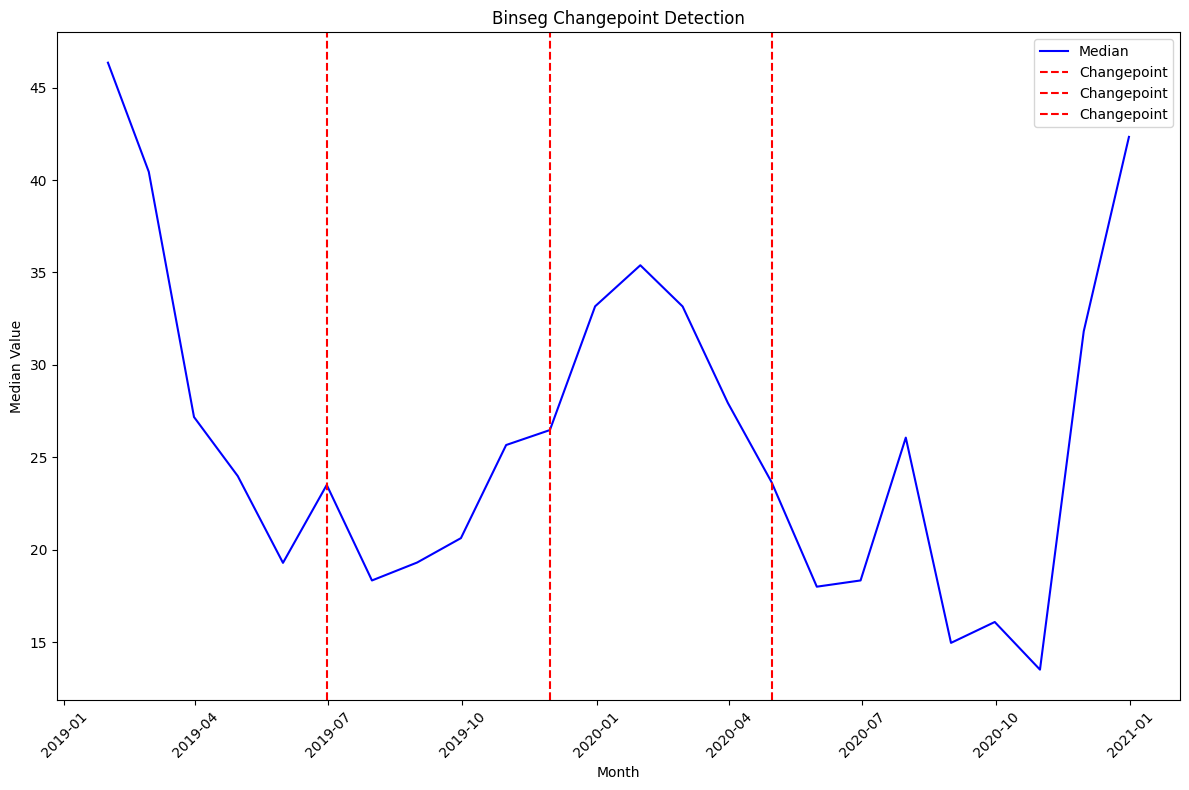

Modified data has been exported to modified_No2TimeSeries.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

file_path = 'No2TimeSeries(Sampling needed).csv'  
data = pd.read_csv(file_path)

data['system:time_start'] = pd.to_datetime(data['system:time_start'])

data.set_index('system:time_start', inplace=True)

monthly_data = data.resample('M').mean()

print(monthly_data.head())

series = monthly_data['Median'].dropna().values

model = "rbf"  
algo = rpt.Binseg(model=model).fit(series)

n_bkps = 3  
bkps = algo.predict(n_bkps=n_bkps)

plt.figure(figsize=(12, 8))
plt.plot(monthly_data.index, monthly_data['Median'], label='Median', color='b')

for bkp in bkps:
    if bkp < len(monthly_data.index):
        plt.axvline(monthly_data.index[bkp], color='r', linestyle='--', label='Changepoint')

plt.xlabel('Month')
plt.ylabel('Median Value')
plt.title('Binseg Changepoint Detection')
plt.legend()

plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

modified_csv_file_path = 'modified_No2TimeSeries.csv'
monthly_data.to_csv(modified_csv_file_path)

print(f'Modified data has been exported to {modified_csv_file_path}')
changepoint_dates = df.index[bkps[:-1]]


In [10]:
changepoint_dates

DatetimeIndex(['2019-02-12', '2019-03-29', '2019-05-13'], dtype='datetime64[ns]', name='system:time_start', freq=None)